# Organización de Datos - TP 1 - AUCTIONS

Alumnos:
- *Rodriguez, Agustín*
- *Scetta, María de los Ángeles*

In [1]:
#Carga de librerías a utilizar
import pandas as pd
import numpy as np
import missingno as msno
import calendar
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Carga de datos recibidos
auctions=pd.read_csv('../data/raw/auctions.csv.gzip', compression='gzip', parse_dates=['date'])

**Auctions**
--------------------------------

In [3]:
#Cantidad de registros y variables
auctions.shape

(19571319, 7)

In [4]:
#Revisión de valores nulos
auctions.isna().sum()

auction_type_id    19571319
country                   0
date                      0
device_id                 0
platform                  0
ref_type_id               0
source_id                 0
dtype: int64

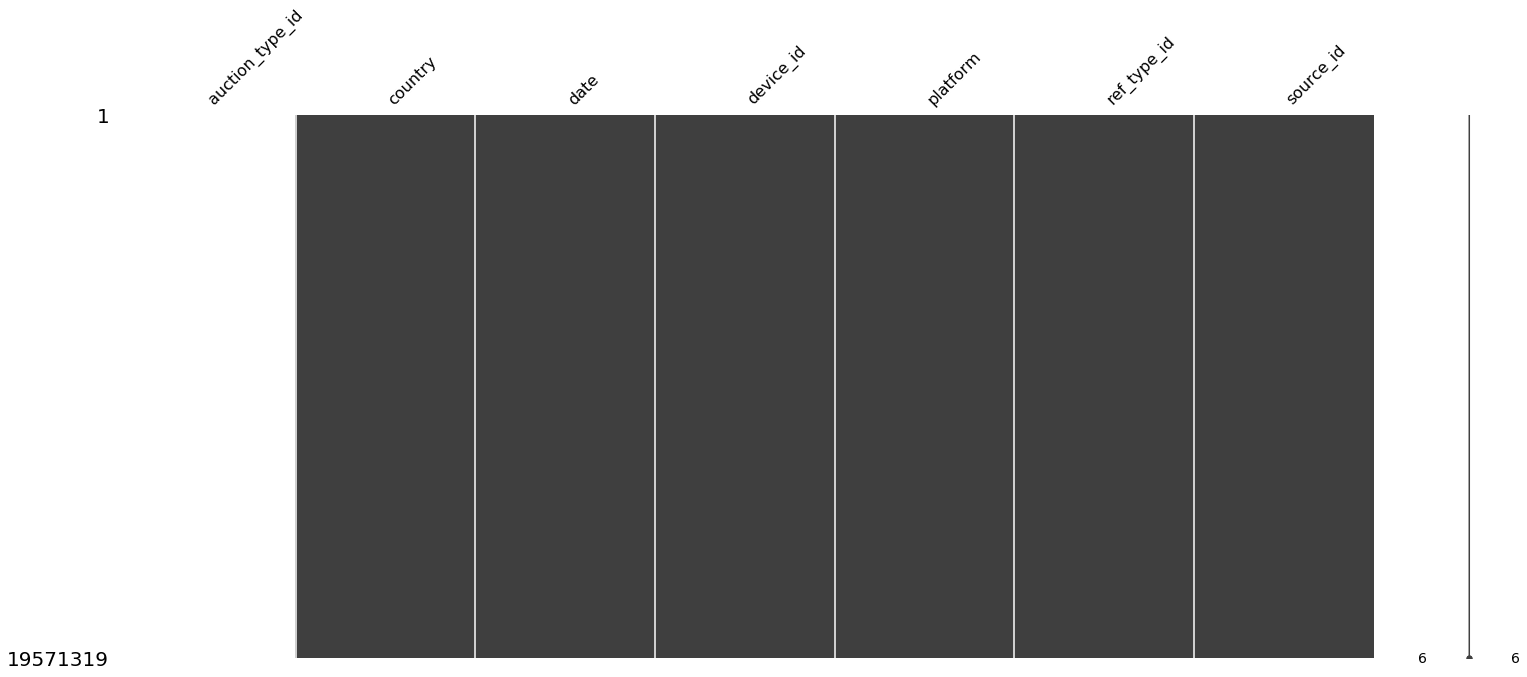

In [6]:
msno.matrix(auctions)
plt.savefig('auctions_matrix.png')

In [4]:
#Revisión de la estructura de datos
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


###  **Análisis de las variables del dataset**

In [7]:
#Búsqueda de valores únicos
auctions.nunique()

auction_type_id           0
country                   1
date               19570963
device_id            206977
platform                  2
ref_type_id               2
source_id                 5
dtype: int64

#### date

In [3]:
#Revisión de la variable date
auctions['fecha'] = auctions['date'].dt.date
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id,fecha
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0,2019-03-11
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0,2019-03-11
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0,2019-03-11
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0,2019-03-11
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0,2019-03-11


In [4]:
#Función para nombrar días de la semana
def dia_semana(fecha):
    return calendar.day_name[fecha.weekday()]

In [5]:
auctions['dia_semana'] = auctions['fecha'].map(dia_semana)
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id,fecha,dia_semana
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0,2019-03-11,Monday
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0,2019-03-11,Monday
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0,2019-03-11,Monday
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0,2019-03-11,Monday
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0,2019-03-11,Monday


In [6]:
#Cantidad de subastas por día de la semana
auctions_dia=auctions.groupby(["fecha", "dia_semana"]).size().to_frame('cant_auctions').reset_index()
auctions_dia

,fecha,dia_semana,cant_auctions
0,2019-03-05,Tuesday,1182401
1,2019-03-06,Wednesday,1032970
2,2019-03-07,Thursday,2047661
3,2019-03-08,Friday,2303002
4,2019-03-09,Saturday,2074552
5,2019-03-10,Sunday,2637534
6,2019-03-11,Monday,2574916
7,2019-03-12,Tuesday,2779910
8,2019-03-13,Wednesday,2938373


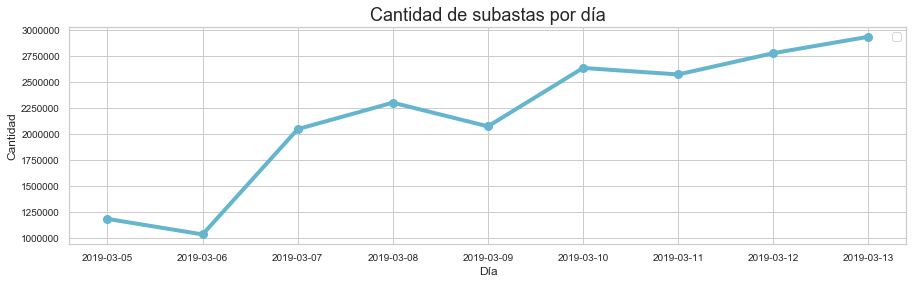

In [7]:
#Visualizar las subastas por día
sns.set(style="whitegrid")
auctions.groupby("fecha").size().plot.line(rot=0, figsize=(15,4), color='c', linewidth=4, fontsize=10, marker='o', markersize=8);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Día', fontsize=12)
plt.title('Cantidad de subastas por día', fontsize=18)
plt.legend('')
plt.savefig("auctions_dia.png")
plt.show()

In [9]:
#Revisión de las subastas por hora
auctions['hora'] = auctions['date'].dt.hour
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id,fecha,dia_semana,hora
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0,2019-03-11,Monday,14
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0,2019-03-11,Monday,14
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0,2019-03-11,Monday,14
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0,2019-03-11,Monday,14
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0,2019-03-11,Monday,14


In [10]:
hora_group=auctions.groupby(["fecha","dia_semana", "hora"]).size().to_frame('cant_auctions').reset_index()
hora_group.head()

,fecha,dia_semana,hora,cant_auctions
0,2019-03-05,Tuesday,0,14859
1,2019-03-05,Tuesday,1,174893
2,2019-03-05,Tuesday,2,155339
3,2019-03-05,Tuesday,3,108498
4,2019-03-05,Tuesday,4,74230


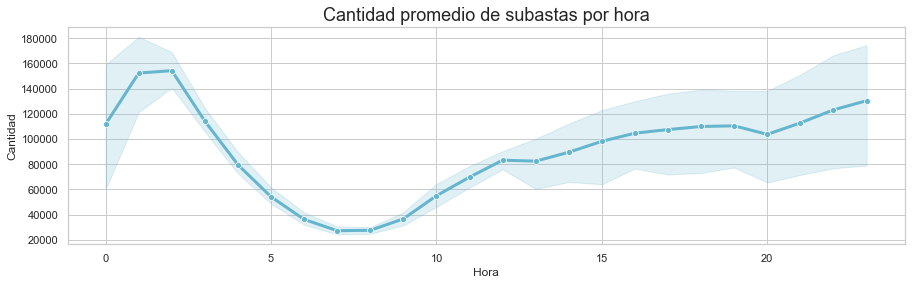

In [12]:
#Análisis de cantidad promedio de subastas por hora
sns.set(style="whitegrid")
fig, ax=plt.subplots(1,1, figsize=(15,4))
sns.lineplot('hora', 'cant_auctions', color='c', linewidth=3, marker='o', markersize=6, data=hora_group, ax=ax)
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Hora', fontsize=12)
plt.title('Cantidad promedio de subastas por hora', fontsize=18)
plt.savefig("auctions_hora.png")
plt.show()

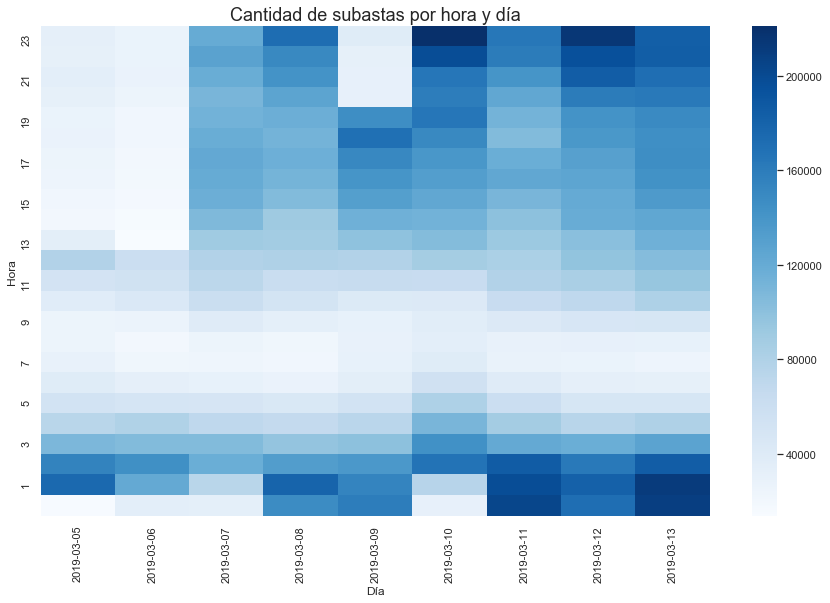

In [14]:
#Análisis de cantidad de subastas por hora y día
installs_heatmap = hora_group.pivot_table(index='hora', columns='fecha', values='cant_auctions', aggfunc='sum')
installs_heatmap = installs_heatmap.sort_index(ascending=False)
g = sns.heatmap(installs_heatmap, cmap="Blues")
g.set_title("Cantidad de subastas por hora y día", fontsize=18)
g.set_xlabel("Día",fontsize=12)
g.set_ylabel("Hora", fontsize=12)

fig = g.get_figure()
fig.set_figwidth(15)
fig.set_figheight(9)

plt.savefig("auctions_dia_hora.png")

In [15]:
#Agrupación de días hábiles y fin de semana
hora_group.loc[(hora_group.dia_semana == 'Saturday') | (hora_group.dia_semana == 'Sunday'), 'Categoria'] = 'Día Finde' 
hora_group.loc[(hora_group.dia_semana != 'Saturday') & (hora_group.dia_semana != 'Sunday'), 'Categoria'] = 'Día Hábil'
hora_group.head()

,fecha,dia_semana,hora,cant_auctions,Categoria
0,2019-03-05,Tuesday,0,14859,Día Hábil
1,2019-03-05,Tuesday,1,174893,Día Hábil
2,2019-03-05,Tuesday,2,155339,Día Hábil
3,2019-03-05,Tuesday,3,108498,Día Hábil
4,2019-03-05,Tuesday,4,74230,Día Hábil


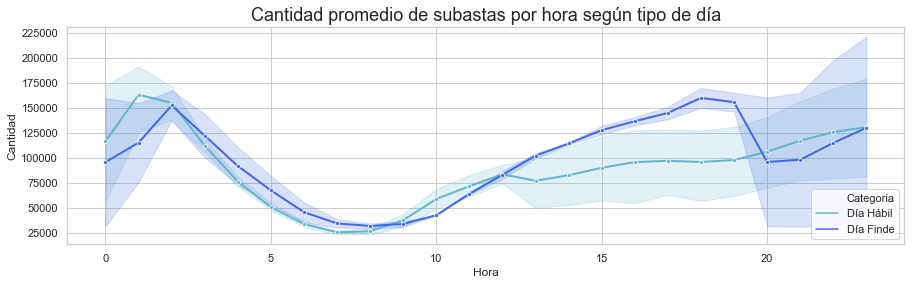

In [19]:
#Análisis de cantidad promedio de subastas por hora según tipo de día
paleta=['c', 'royalblue']
sns.set(style="whitegrid")
fig, ax=plt.subplots(1,1, figsize=(15,4))
sns.lineplot('hora', 'cant_auctions', hue= "Categoria", palette=paleta, linewidth=2, marker='o', markersize=4, data=hora_group, ax=ax)
plt.legend(ncol=1, loc='lower right');
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Hora', fontsize=12)
plt.title('Cantidad promedio de subastas por hora según tipo de día', fontsize=18)
plt.savefig("auctions_tipo_dia_hora.png")
plt.show()

#### device_id

In [116]:
#Búsqueda de valores únicos de la variable
auctions.device_id.nunique()

206977

In [81]:
#Cantidad de veces que participa cada dispositivo por día
auctions_device_id=auctions.groupby(["device_id", "fecha"]).size().to_frame('cantidad').reset_index()
auctions_device_id.head()

,device_id,fecha,cantidad
0,113858820194433,2019-03-06,1
1,113858820194433,2019-03-07,8
2,113858820194433,2019-03-08,3
3,113858820194433,2019-03-09,10
4,113858820194433,2019-03-10,8


In [82]:
#Cantidad de dispositivos que participan por día
auctions_device_id.groupby("fecha").size().to_frame('cant_device_id')

,cant_device_id
fecha,
2019-03-05,66142
2019-03-06,63174
2019-03-07,92181
2019-03-08,98437
2019-03-09,89496
2019-03-10,96861
2019-03-11,96676
2019-03-12,102516
2019-03-13,106348


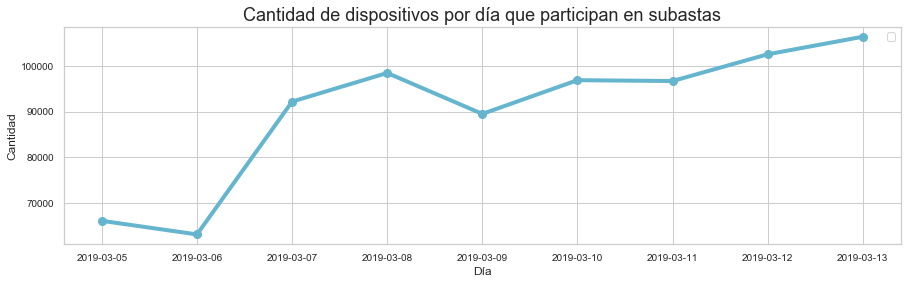

In [74]:
#Visualizar los dispositivos que participan por día
sns.set(style="whitegrid")
auctions_device_id.groupby("fecha").size().plot.line(rot=0, figsize=(15,4), color='c', linewidth=4, fontsize=10, marker='o', markersize=8);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Día', fontsize=12)
plt.title('Cantidad de dispositivos por día que participan en subastas', fontsize=18)
plt.legend('')
plt.savefig("auctions_dispos_dia.png")
plt.show()

In [83]:
#Cantidad de veces que participó de la subasta cada dispositivo
auctions_device_id.groupby('device_id').aggregate(sum).sort_values("cantidad", ascending=False).head()

,cantidad
device_id,
633139769114048761,27762
7202276635029175071,23055
7298861376107043945,18188
6302840482782120473,16400
5376802567578262905,16367


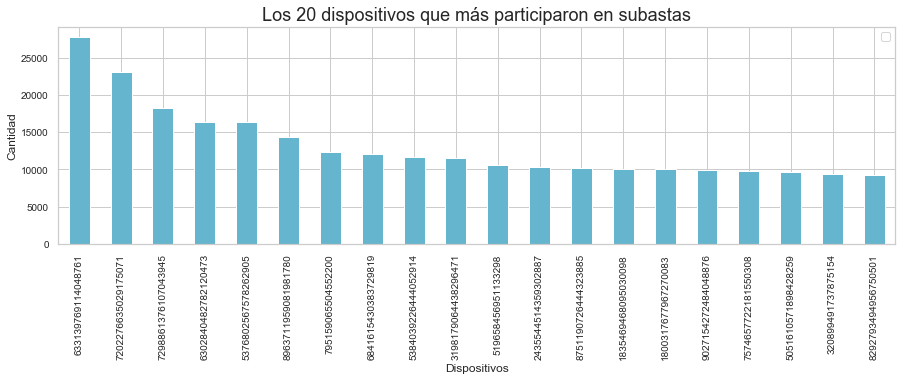

In [84]:
#Visualizar los 20 dispositivos que más participaron
sns.set(style="whitegrid")
auctions_device_id.groupby('device_id').aggregate(sum).sort_values("cantidad",
                    ascending=False).head(20).plot.bar(rot=90, figsize=(15,4), color='c', fontsize=10);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Dispositivos', fontsize=12)
plt.title('Los 20 dispositivos que más participaron en subastas', fontsize=18)
plt.legend('')
plt.savefig("auctions_dispositivos.png")
plt.show()

In [63]:
auctions.device_id.value_counts().tail()

6586001901497243197    1
4903599056466380772    1
9101372426762671929    1
4378253870857185347    1
5221298118515168096    1
Name: device_id, dtype: int64

#### platform

In [15]:
#Búsqueda de valores únicos de la variable
auctions.platform.unique()

array([1, 2], dtype=int64)

In [36]:
auctions.platform.value_counts()

1    15541825
2     4029494
Name: platform, dtype: int64

In [37]:
platform = auctions[['platform']]
type_1 = auctions[(auctions['platform'] == 1)]
type_2 = auctions[(auctions['platform'] == 2)]

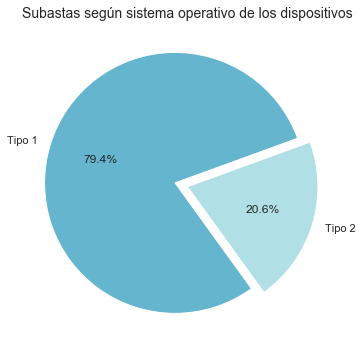

In [38]:
sizes = [type_1.platform.count(), type_2.platform.count()]
nombres = ['Tipo 1', 'Tipo 2']

plt.figure(figsize=(15, 6))
plt.title('Subastas según sistema operativo de los dispositivos', fontsize=14)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['c', 'powderblue'], explode=(0.1, 0))
plt.savefig("auctions_platform.png")
plt.show()

In [14]:
auctions_platform=auctions.groupby(["platform", "fecha","dia_semana"]).size().to_frame('cant_auctions').reset_index()
auctions_platform

,platform,fecha,dia_semana,cant_auctions
0,1,2019-03-05,Tuesday,719286
1,1,2019-03-06,Wednesday,579624
2,1,2019-03-07,Thursday,1617609
3,1,2019-03-08,Friday,1898054
4,1,2019-03-09,Saturday,1618742
5,1,2019-03-10,Sunday,2149876
6,1,2019-03-11,Monday,2165005
7,1,2019-03-12,Tuesday,2337162
8,1,2019-03-13,Wednesday,2456467
9,2,2019-03-05,Tuesday,463115


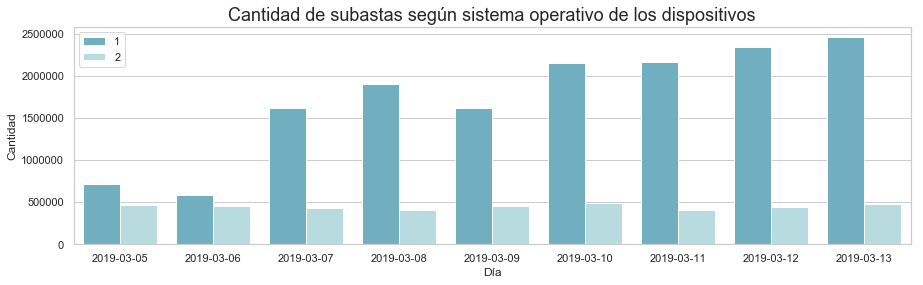

In [157]:
#Visualizar la cantidad de dispositivos de cada sistemas operativos que participan por día
paleta=['c', 'powderblue']
sns.set(style="whitegrid")
plt.figure(figsize=(15, 4))
sns.barplot(x="fecha", y="cant_auctions", palette=paleta, hue="platform",
            data=auctions_platform);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Día', fontsize=12)
plt.title('Cantidad de subastas según sistema operativo de los dispositivos', fontsize=18)
plt.legend(ncol=1, loc='upper left'),
plt.savefig("auctions_platform_bars.png")
plt.show()

#### ref_type_id

In [158]:
#Búsqueda de valores únicos de la variable
auctions.ref_type_id.unique()

array([1, 7], dtype=int64)

In [163]:
auctions.ref_type_id.value_counts()

1    15541825
7     4029494
Name: ref_type_id, dtype: int64

In [85]:
ref_type_id = auctions[['ref_type_id']]
ref_type_1 = auctions[(auctions['ref_type_id'] == 1)]
ref_type_7 = auctions[(auctions['ref_type_id'] == 7)]

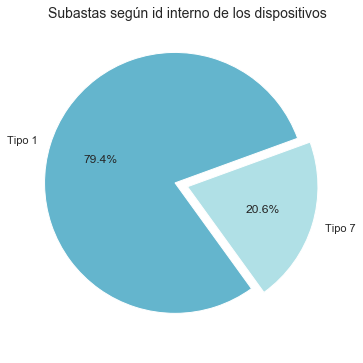

In [86]:
sizes = [ref_type_1.ref_type_id.count(), ref_type_7.ref_type_id.count()]
nombres = ['Tipo 1', 'Tipo 7']

plt.figure(figsize=(15, 6))
plt.title('Subastas según id interno de los dispositivos', fontsize=14)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['c', 'powderblue'], explode=(0.1, 0))
plt.savefig("auctions_ref_type_id.png")
plt.show()

In [168]:
#Cantidad de veces que participa cada dispositivo por día
auctions.groupby(["platform", "ref_type_id"]).size().to_frame('cantidad').reset_index()

,platform,ref_type_id,cantidad
0,1,1,15541825
1,2,7,4029494


#### source_id

In [17]:
#Búsqueda de valores únicos de la variable
auctions.source_id.unique()

array([0, 5, 6, 1, 2], dtype=int64)

In [169]:
auctions.source_id.value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

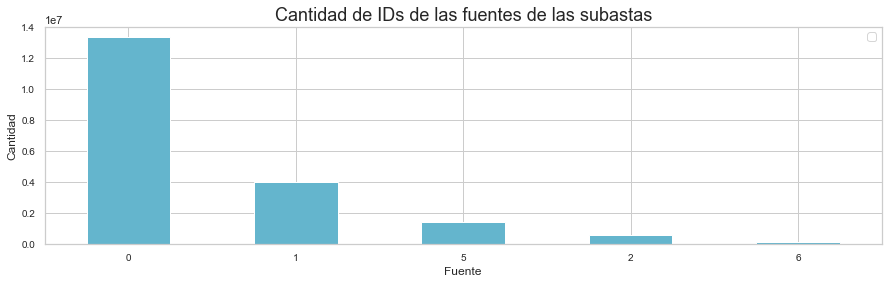

In [197]:
#Visualizar la cantidad de fuentes de subastas
sns.set(style="whitegrid")
auctions.groupby("source_id").size().sort_values(ascending=False).plot.bar(rot=0, figsize=(15,4), color='c', fontsize=10);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Fuente', fontsize=12)
plt.title('Cantidad de IDs de las fuentes de las subastas', fontsize=18)
plt.legend('')
plt.savefig("auctions_source_cant.png")
plt.show()

In [88]:
#Cantidad de fuentes de subastas por día
auctions_source=auctions.groupby(["source_id", "fecha","dia_semana"]).size().to_frame('cant_source').reset_index()
auctions_source.head()

,source_id,fecha,dia_semana,cant_source
0,0,2019-03-05,Tuesday,719697
1,0,2019-03-06,Wednesday,664822
2,0,2019-03-07,Thursday,1395641
3,0,2019-03-08,Friday,1494019
4,0,2019-03-09,Saturday,1356567


In [94]:
auctions_source_dia=auctions_source.groupby(["source_id", "fecha"]).sum().reset_index()
auctions_source_dia = auctions_source_dia.iloc[:,1:3]
auctions_source_dia.head()

,fecha,cant_source
0,2019-03-05,719697
1,2019-03-06,664822
2,2019-03-07,1395641
3,2019-03-08,1494019
4,2019-03-09,1356567


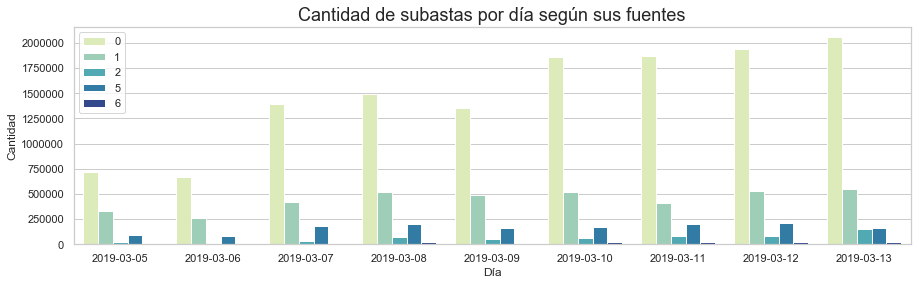

In [185]:
#Visualizar la cantidad de subastas por día según sus fuentes
sns.set(style="whitegrid")
plt.figure(figsize=(15, 4))
sns.barplot(x="fecha", y="cant_source", palette="YlGnBu", hue="source_id",
            data=auctions_source);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Día', fontsize=12)
plt.title('Cantidad de subastas por día según sus fuentes', fontsize=18)
plt.legend(ncol=1, loc='upper left'),
plt.savefig("auctions_source_bars.png")
plt.show()